In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_csv('creditclean.csv')

In [3]:
credit.head()

ID  LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0  1.0      20000  female  university         1   24      2      2     -1   
1  2.0     120000  female  university         2   26     -1      2      0   
2  3.0      90000  female  university         2   34      0      0      0   
3  4.0      50000  female  university         1   37      0      0      0   
4  5.0      50000    male  university         1   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                     default  
1      1000         0      2000                     default  
2      1000      1000      5000                 not default  
3      1100      1069      1000                 not default  
4      9000       689       679                 not default  

[5 rows x 25 columns]

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

In [5]:
credit.describe()

ID       LIMIT_BAL      MARRIAGE           AGE         PAY_0  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.551867     35.485500     -0.016700   
std     8660.398374   129747.661567      0.521970      9.217904      1.123802   
min        1.000000    10000.000000      0.000000     21.000000     -2.000000   
25%     7500.750000    50000.000000      1.000000     28.000000     -1.000000   
50%    15000.500000   140000.000000      2.000000     34.000000      0.000000   
75%    22500.250000   240000.000000      2.000000     41.000000      0.000000   
max    30000.000000  1000000.000000      3.000000     79.000000      8.000000   

              PAY_2         PAY_3         PAY_4         PAY_5         PAY_6  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.133767     -0.166200     -0.220667     -0.266200     -0.291100   
std        1.197186      1.196868      1.169139      1.133187      1.149988   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...     BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  ...  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   ...  4.701315e+04   43262.948967   40311.400967   38871.760400   
std    ...  6.934939e+04   64332.856134   60797.155770   59554.107537   
min    ... -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    ...  2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    ...  2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    ...  6.016475e+04   54506.000000   50190.500000   49198.250000   
max    ...  1.664089e+06  891586.000000  927171.000000  961664.000000   

            PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000  

[8 rows x 22 columns]

In [6]:
credit = pd.get_dummies(credit)

In [7]:
credit.head(100)

ID  LIMIT_BAL  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0     1.0      20000         1   24      2      2     -1     -1     -2     -2   
1     2.0     120000         2   26     -1      2      0      0      0      2   
2     3.0      90000         2   34      0      0      0      0      0      0   
3     4.0      50000         1   37      0      0      0      0      0      0   
4     5.0      50000         1   57     -1      0     -1      0      0      0   
..    ...        ...       ...  ...    ...    ...    ...    ...    ...    ...   
95   96.0      90000         2   35      0      0      0      0      0      0   
96   97.0     360000         1   43     -1     -1     -1     -1     -1      0   
97   98.0     150000         2   27      0      0      0      0      0      0   
98   99.0      50000         1   22      0      0      0      0      0      0   
99  100.0      20000         1   38      0      0      0      0      0     -1   

    ...  PAY_AMT5  PAY_AMT6  SEX_female  SEX_male  EDUCATION_graduate school  \
0   ...         0         0           1         0                          0   
1   ...         0      2000           1         0                          0   
2   ...      1000      5000           1         0                          0   
3   ...      1069      1000           1         0                          0   
4   ...       689       679           0         1                          0   
..  ...       ...       ...         ...       ...                        ...   
95  ...      1104      1143           0         1                          0   
96  ...         0     68978           0         1                          1   
97  ...      1698       800           0         1                          1   
98  ...       321       197           1         0                          0   
99  ...       150         0           0         1                          0   

    EDUCATION_high school  EDUCATION_other  EDUCATION_university  \
0                       0                0                     1   
1                       0                0                     1   
2                       0                0                     1   
3                       0                0                     1   
4                       0                0                     1   
..                    ...              ...                   ...   
95                      0                0                     1   
96                      0                0                     0   
97                      0                0                     0   
98                      1                0                     0   
99                      0                0                     1   

    default payment next month_default  default payment next month_not default  
0                                    1                                       0  
1                                    1                                       0  
2                                    0                                       1  
3                                    0                                       1  
4                                    0                                       1  
..                                 ...                                     ...  
95                                   0                                       1  
96                                   0                                       1  
97                                   0                                       1  
98                                   0                                       1  
99                                   1                                       0  

[100 rows x 30 columns]

In [8]:
# list column name
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')


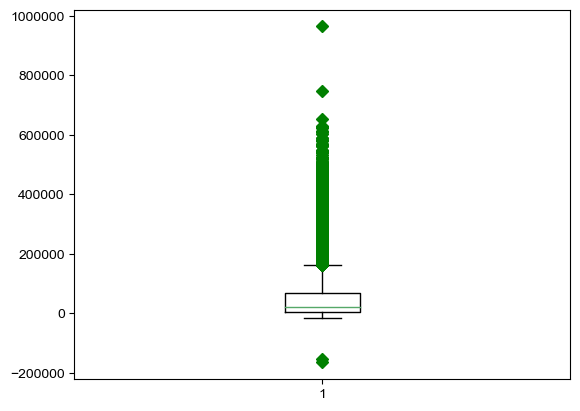

In [9]:
A = credit['BILL_AMT1']
plt.boxplot(A, 0, 'gD')
# if le6 at y-axis, specify axis to remove otherwise will get error "this method only works with the scalarformatter"
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.style.use('seaborn')
plt.show()

In [10]:
# correlation matrix
corrMat = credit.corr()
print(corrMat)

                                              ID  LIMIT_BAL  MARRIAGE  \
ID                                      1.000000   0.026179 -0.029079   
LIMIT_BAL                               0.026179   1.000000 -0.108139   
MARRIAGE                               -0.029079  -0.108139  1.000000   
AGE                                     0.018678   0.144713 -0.414170   
PAY_0                                  -0.030575  -0.271214  0.019917   
PAY_2                                  -0.011215  -0.296382  0.024199   
PAY_3                                  -0.018494  -0.286123  0.032688   
PAY_4                                  -0.002735  -0.267460  0.033122   
PAY_5                                  -0.022199  -0.249411  0.035629   
PAY_6                                  -0.020270  -0.235195  0.034345   
BILL_AMT1                               0.019389   0.285430 -0.023472   
BILL_AMT2                               0.017982   0.278314 -0.021602   
BILL_AMT3                               0.024354   

[30 rows x 30 columns]


In [11]:
# covariance matrix
covMat = credit.cov()
print(covMat)

                                                  ID     LIMIT_BAL  \
ID                                      7.500250e+07  2.941664e+07   
LIMIT_BAL                               2.941664e+07  1.683446e+10   
MARRIAGE                               -1.314525e+02 -7.323670e+03   
AGE                                     1.491057e+03  1.730767e+05   
PAY_0                                  -2.975726e+02 -3.954593e+04   
PAY_2                                  -1.162770e+02 -4.603765e+04   
PAY_3                                  -1.916922e+02 -4.443225e+04   
PAY_4                                  -2.769132e+01 -4.057181e+04   
PAY_5                                  -2.178600e+02 -3.667056e+04   
PAY_6                                  -2.018774e+02 -3.509308e+04   
BILL_AMT1                               1.236447e+07  2.727020e+09   
BILL_AMT2                               1.108392e+07  2.570130e+09   
BILL_AMT3                               1.462688e+07  2.548533e+09   
BILL_AMT4           

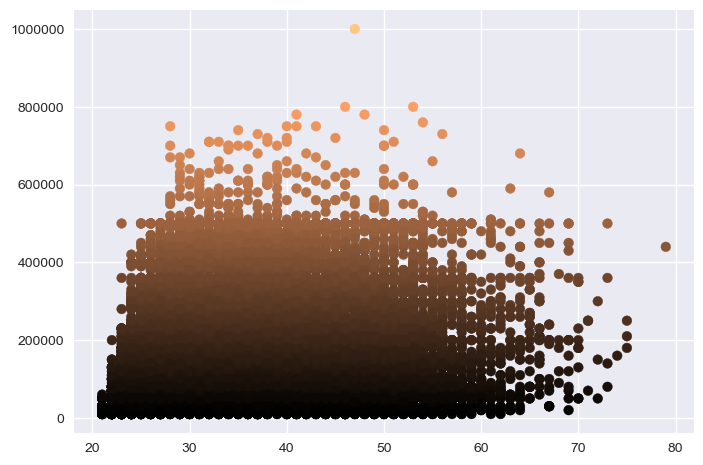

In [12]:
x = credit['AGE']
y = credit['LIMIT_BAL']
plt.scatter(x,y, c = credit['LIMIT_BAL'], cmap = 'copper')
plt.style.use('seaborn')
plt.ticklabel_format(style = 'plain')
plt.show()

In [13]:
pandas_profiling.ProfileReport(credit)

In [14]:
paymentVSdefault=pd.crosstab(index=credit['PAY_0'],columns=credit['default payment next month_default'])
print(paymentVSdefault)

default payment next month_default      0     1
PAY_0                                          
-2                                   2394   365
-1                                   4732   954
 0                                  12849  1888
 1                                   2436  1252
 2                                    823  1844
 3                                     78   244
 4                                     24    52
 5                                     13    13
 6                                      5     6
 7                                      2     7
 8                                      8    11


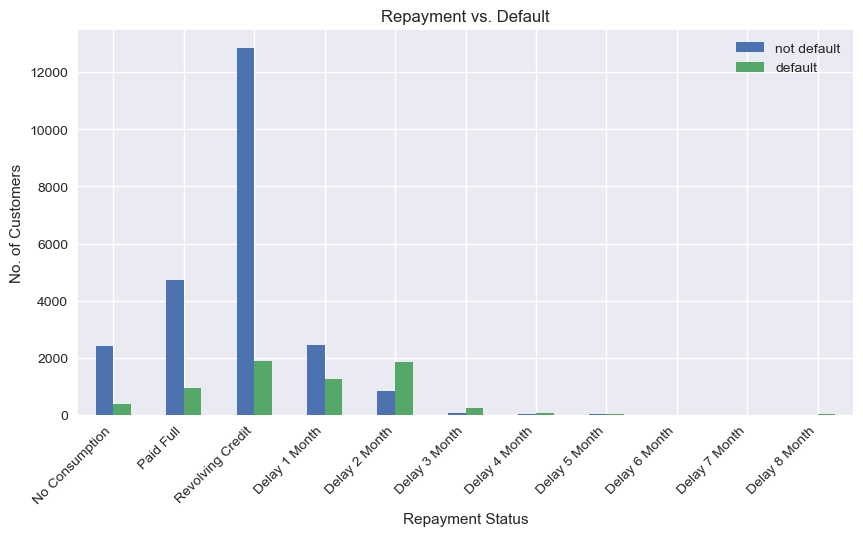

In [15]:
ax = paymentVSdefault.plot.bar(figsize = (10,5))
ax.set_xticklabels(['No Consumption', 'Paid Full', 'Revolving Credit', 'Delay 1 Month',
                    'Delay 2 Month', 'Delay 3 Month', 'Delay 4 Month', 'Delay 5 Month',
                    'Delay 6 Month', 'Delay 7 Month', 'Delay 8 Month'], rotation = 45, ha='right')
ax.set_xlabel('Repayment Status')
ax.set_ylabel('No. of Customers')
ax.set_title('Repayment vs. Default')
ax.legend(['not default', 'default'])
plt.show()